#  K-Model using Penguin Dataset

K-means clustering is a simple but powerful technique in data analysis used to group similar data points.

This example contains a real sample dataset of 345 penguins. This notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex.

In [75]:
#import standard operantion packages:
import numpy as np
import pandas as pd
# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
#download csv and reveal first 10 rows:
df = pd.read_csv("./penguins.csv")

In [77]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


#### Labels/Columns Inlcude:
species, island, bill_length_mm,bill_depth_mm, flipper_length_mm, body_mass_g, sex

## Step 1: EDA

 - Explore data
 - Look for missing values
 - encode data
 - drop columns
 - scaling eatures using StadardScaler

In [78]:
#explore dataset
df['species'].unique()

#dataset shows 3 species of penguins.

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [79]:
#count each species:
df['species'].value_counts(dropna = False)



Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In this case, we know that the perfect number of clusters is 3, but defining clusters may not always be as easy. Find the perfect number allows you to find other relationships in the data.


In [80]:
#check for missing values:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [81]:
#drop missing values--set axis = 0 for row, 1 for columns:
penguins_subset = df.dropna(axis=0).reset_index(drop = True)

In [82]:
penguins_subset.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False           False          False              False   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
328    False   False           False          False              False   
329    False   False           False          False              False   
330    False   False           False          False              False   
331    False   False           False          False              False   
332    False   False           False          False              False   

     body_mass_g    sex  
0          False  False

### Encode Data
Sex column is categorical should be converted to a value of 0 or 1, or numerical values.

The drop_first parameter should be set to True. This removes redundant data. The columns
parameter can optionally be set to ['sex'] to specify that only the 'sex' column gets this
operation performed on it. Since species is the target, that will be left alone.



In [83]:

penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


The drop_first parameter should be set to True. This removes redundant data. The columns
parameter can optionally be set to ['sex'] to specify that only the 'sex' column gets this
operation performed on it.

In [84]:
#some of the sex columns have uppercase, some have lower case. 
penguins_subset['sex'] = penguins_subset['sex'].str.upper()
#convert sex columns to numeric values:

penguins_subset = pd.get_dummies(penguins_subset, drop_first = True
,columns=['sex'])

penguins_subset.head(10)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,0
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,1
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,0
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,1
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,1


### Remove columns:
Remove columns that do not relate to physical characteristics of the penguin: 
We will remove the 'island' and leave species column for now.

In [85]:
penguins_subset = penguins_subset.drop(['island'], axis=1)


In [86]:
penguins_subset.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
5,Adelie,38.9,17.8,181.0,3625.0,0
6,Adelie,39.2,19.6,195.0,4675.0,1
7,Adelie,41.1,17.6,182.0,3200.0,0
8,Adelie,38.6,21.2,191.0,3800.0,1
9,Adelie,34.6,21.1,198.0,4400.0,1


## K-Means Scaler
Since k-Means uses distance between observations, scaling points will produce better results. StandardScaler scales each point, x, by substracting the mean observed value for that feature by the standard devation.

x-scaled = (x-mean(X)/std)
all points have a mean of 0 and std of 1.





In [89]:
# Exclude `species` variable from X since it's not a feature and does not need to be scaled.

X = penguins_subset.drop(['species'], axis=1)

In [90]:
#Scale feature:
X_scaled = StandardScaler().fit_transform(X)


## Data Modeling:



Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called kmeans_inertia that takes in num_clusters and x_vals (X_scaled) and returns a list of each k-value’s inertia.


In [94]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 11)]
def kmeans_inertia(num_clusters, x_vals):

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

In [95]:
#return a list of k=2 to k=10 to find the perfect cluster number:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia



[885.6224143652249,
 578.8284278107234,
 386.1453442477328,
 284.5464837898288,
 217.9285857380768,
 201.3928784342327,
 185.46131043232302,
 173.45452114979852,
 164.12001520260708]

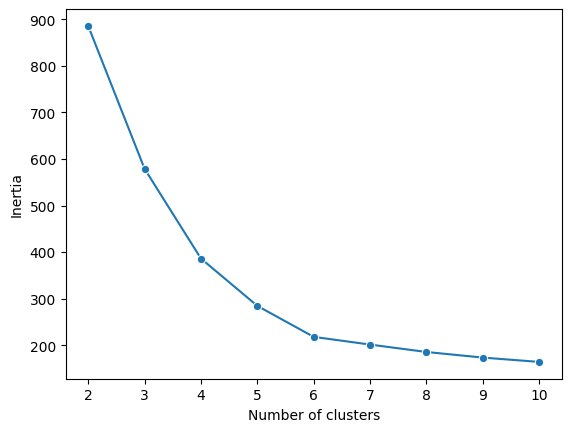

In [96]:
#visualize the cluster:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [97]:
### Evaluate Silhouette Score using function and compare to the k values:
def kmeans_sil(num_clusters, x_vals):

    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score



[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5263224884981607,
 0.47774022332151733,
 0.4221920732643224,
 0.36062890821417276,
 0.3617250563420018]

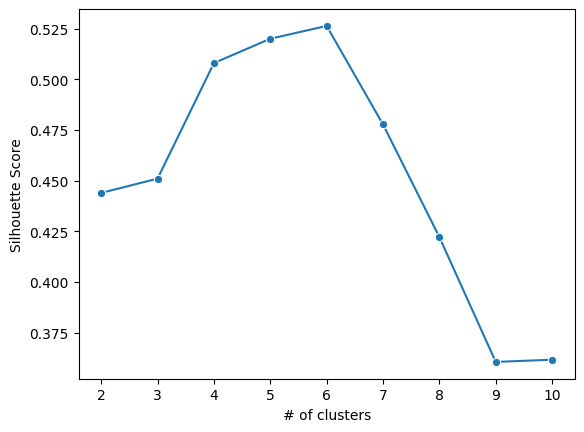

In [98]:
 # Create a line plot.
### YOUR CODE HERE ###
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters.

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although five clusters also yield a relatively good silhouette score.

In [100]:
# since 6 shows to be optimal, we will test this:
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [101]:
print('Unique labels:', np.unique(kmeans6.labels_))


Unique labels: [0 1 2 3 4 5]


In [102]:
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,2
1,Adelie,39.5,17.4,186.0,3800.0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,1,2


In [103]:
# Verify if any `cluster` can be differentiated by `species`.

penguins_subset.groupby(by=['cluster', 'species']).size()


cluster  species  
0        Gentoo       58
1        Adelie       73
         Chinstrap     5
2        Adelie       71
3        Adelie        2
         Chinstrap    34
4        Gentoo       61
5        Chinstrap    29
dtype: int64

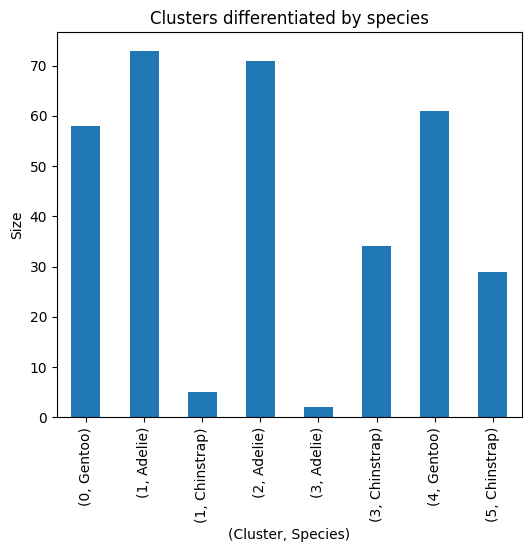

In [106]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
figsize=(6,5), ylabel='Size',xlabel='(Cluster, Species)');

In [109]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.

penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)


cluster  species    sex_MALE
1        Adelie     0           73
2        Adelie     1           71
4        Gentoo     1           61
0        Gentoo     0           58
3        Chinstrap  1           34
5        Chinstrap  0           29
1        Chinstrap  0            5
3        Adelie     1            2
dtype: int64

The graph shows that each 'cluster' can be differentiated by 'species' and 'sex_MALE'. Furthermore, each cluster is mostly comprised of one sex and one species.

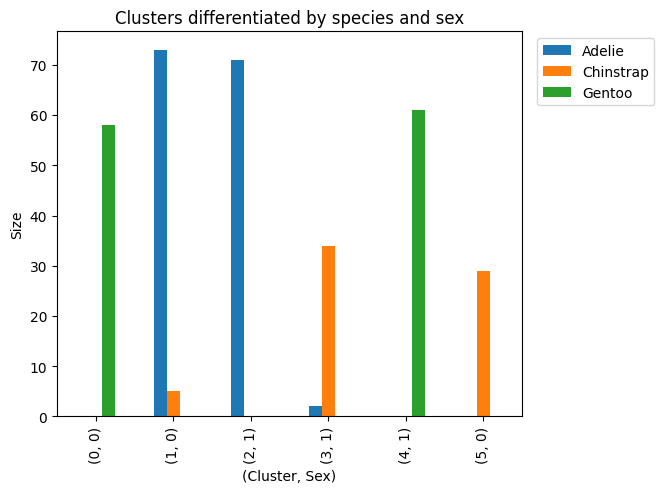

In [110]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',figsize=(6, 5), ylabel='Size',xlabel='(Cluster, Sex)')

plt.legend(bbox_to_anchor=(1.3, 1.0))


## Summary
The elbow plot and especially the silhouette scores suggests that 6
clusters are optimal for this data. - Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) or each of the three species (2 sexes * 3 different species = 6 clusters).

The K-means clustering enabled this ata to be effectively grouped. It helped identify patterns that can educate team members aboutpenguins. 

The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.